<a href="https://colab.research.google.com/github/DSFay/Modeling-II-Machine-Learning/blob/main/EDA_and_model_fitting_ML%20final%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please note that both group members, Lan Ma and Faelynn Carroll, have contributed significantly, and approximately equally, to the submitted work.

## Exploratory data analysis and visualization

<AxesSubplot:>

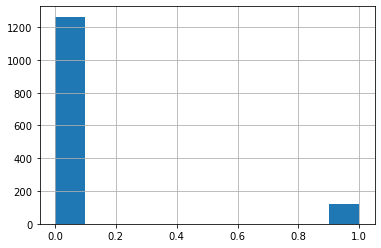

In [ ]:
df_final.Onset1.hist()

In [ ]:
# That is a super imbalanced dataset. 8.54% '1' (presence of conflict onset) and 91.46% '0' in the dataset
df_final.Onset1.sum()/len(df_final.Onset1)

0.085383502170767

### Splitting the data into teleconnected and weakly affected areas 

In [ ]:
# creating the Teleconnected data set

df_final_teleconnected = df_final[df_final['teleconnected_dummy']==1]
df_final_teleconnected.head(10)                                           

,Country,Year,Direct N2O,Indirect N2O,CH4,CO2eq & AR5,CO2,Area harvested,Production,Yield,Stocks,Milk Animals,Meat Animals,Onset1,Anomaly,teleconnected_dummy
129,Angola,1990,3.144133,311.252433,5153.75257,11266.163600,0.763067,83530.305556,318221.0,288254.545455,121832.586207,1.040686e+06,42929.744186,0,0.319167,1
130,Angola,1991,3.197933,311.931913,5153.19568,11284.072112,0.774667,93968.972222,315000.0,291172.727273,130943.741379,1.054795e+06,42657.069767,1,0.641667,1
131,Angola,1992,3.267467,312.724340,5147.66432,11304.070160,0.792733,102134.861111,320000.0,289000.000000,139312.034483,1.075282e+06,41577.000000,0,0.626667,1
132,Angola,1993,3.162733,311.745567,5148.73957,11276.022564,0.766856,111352.138889,310000.0,280927.272727,134282.500000,1.050755e+06,41810.046512,0,0.323333,1
133,Angola,1994,3.079133,312.103527,5157.60095,11274.560232,0.746867,104995.166667,300000.0,272836.363636,156153.448276,1.021677e+06,45341.418605,1,0.480000,1
134,Angola,1995,3.059189,310.831640,5155.25156,11249.258612,0.742867,94721.138889,287517.0,274118.181818,163666.862069,1.028973e+06,46412.139535,0,-0.170833,1
135,Angola,1996,3.357467,375.923547,5152.68904,11771.077220,0.812533,93928.027778,330000.0,297490.909091,169099.155172,1.117909e+06,46190.930233,1,-0.459167,1
136,Angola,1997,3.587278,354.899220,5150.56426,11288.099996,0.867189,95084.083333,356000.0,317045.454545,161774.465517,1.191023e+06,46208.511628,0,1.170833,1
137,Angola,1998,3.923989,434.031767,5150.48548,13156.236900,0.945256,104545.611111,390000.0,341418.181818,201546.620690,1.277918e+06,47085.162791,1,-0.055000,1
138,Angola,1999,3.929789,404.335867,5158.03983,12385.976248,0.951189,99752.611111,353177.0,354345.454545,192781.224138,1.312791e+06,46507.372093,0,-1.224167,1


In [ ]:
df_final.shape

(1382, 16)

In [ ]:
df_final_teleconnected.shape

(1186, 16)

In [ ]:
print('The teleconnected countries represent',(len(df_final_teleconnected)/len(df_final))*100, '% of the data.', 1382-1186,'rows are dropped in the Teleconnected set.')

The teleconnected countries represent 85.81765557163531 % of the data. 196 rows are dropped in the Teleconnected set.


In [ ]:
# In the teleconnected countries (presence of conflict onset) is 0.7% higher than in the full dataset

print(df_final_teleconnected.Onset1.sum()/len(df_final_teleconnected.Onset1)*100,'%')

8.600337268128163 %


In [ ]:
# creating the weakly affected (wa) group 

df_final_wa = df_final[df_final['teleconnected_dummy']==0]
df_final_wa.head(10)  

,Country,Year,Direct N2O,Indirect N2O,CH4,CO2eq & AR5,CO2,Area harvested,Production,Yield,Stocks,Milk Animals,Meat Animals,Onset1,Anomaly,teleconnected_dummy
29,Afghanistan,1990,4.235000,71.541693,-704.669233,1732.682591,1.550200,132532.131579,3701409.6,2.515455e+06,175119.515625,3.586927e+06,48690.125000,0,0.319167,0
30,Afghanistan,1991,4.378678,74.769900,-721.623467,1806.471914,1.587400,139308.500000,3880000.0,2.562582e+06,191237.765625,3.644364e+06,51587.333333,0,0.641667,0
31,Afghanistan,1992,4.303800,75.621927,-774.507000,1786.807018,1.556533,134016.789474,3825810.8,2.497091e+06,182372.390625,3.594255e+06,51219.166667,0,0.626667,0
32,Afghanistan,1993,4.365400,76.214220,-778.571300,1804.109005,1.562200,154563.605263,3793815.6,2.497055e+06,202980.015625,3.575964e+06,51084.750000,0,0.323333,0
33,Afghanistan,1994,4.578825,79.041300,-781.506233,1900.753029,1.644825,161374.815789,3959961.2,2.576091e+06,215934.140625,3.657764e+06,51285.416667,0,0.480000,0
34,Afghanistan,1995,4.793563,83.323153,-783.055267,2014.109495,1.711275,157133.947368,4009862.0,2.601345e+06,226387.687500,3.740444e+06,51437.958333,0,-0.170833,0
35,Afghanistan,1996,4.629078,93.856240,-784.813633,2178.043959,1.628389,159221.473684,4248800.0,2.812145e+06,234265.828125,3.958527e+06,51532.687500,0,-0.459167,0
36,Afghanistan,1997,5.123333,102.805860,-786.466633,2421.703286,1.803600,160618.789474,4729600.0,3.104818e+06,255158.578125,4.387273e+06,51595.291667,0,1.170833,0
37,Afghanistan,1998,5.550067,109.594807,-787.198400,2620.322077,1.968133,163873.236842,5130800.0,3.400782e+06,266675.859375,4.817041e+06,51824.270833,0,-0.055000,0
38,Afghanistan,1999,5.991200,119.841100,-788.037300,2881.260586,2.135400,150080.473684,5450800.0,3.694636e+06,254262.484375,5.312805e+06,52089.416667,0,-1.224167,0


In [ ]:
# There are 196 rows/entries in the weakly affected group

df_final_wa.shape

(196, 16)

In [ ]:
# Comparing the share of countries in each group (teleconnected and weakly affected)

number_wa_countries = len(df_final_wa['Country'].value_counts())
number_teleconnected_countries = len(df_final_teleconnected['Country'].value_counts())

print ('There are ',number_wa_countries,' weakly affected countries in our final data set, and ',number_teleconnected_countries,' teleconnected countries.' )
print('The weakly affected countries are',df_final_wa['Country'].unique(),'.')

There are  7  weakly affected countries in our final data set, and  42  teleconnected countries.
The weakly affected countries are ['Afghanistan' 'Albania' 'Egypt' 'Jordan' 'Nepal' 'Pakistan' 'Tunisia'] .


#### The final data frame continas just 7 weakly affected countries. However, the original list of countries contained in the teleconnections data set contains 17 weakly affected countries: Afghanistan, Albania, Armenia, Azerbaijan, Egypt, Jordan, Kazakhstan, KyrgyzRepublic, Moldova, Nepal, Pakistan, Tajikistan, Tunisia, Turkey, Turkmenistan, Ukraine, and Uzbekistan.

#### There were originally 71 teleconnected countries in the teleconnections data set, and the final data frame here contains just 42 teleconnected countries

#### It appears that 10 out of the 17 weatly affected countries, and 29 of the teleconnected countries were dropped in the data cleaning process due to incomplete data for the other variables.

   n_all = 49  
   n_teleconnected = 42

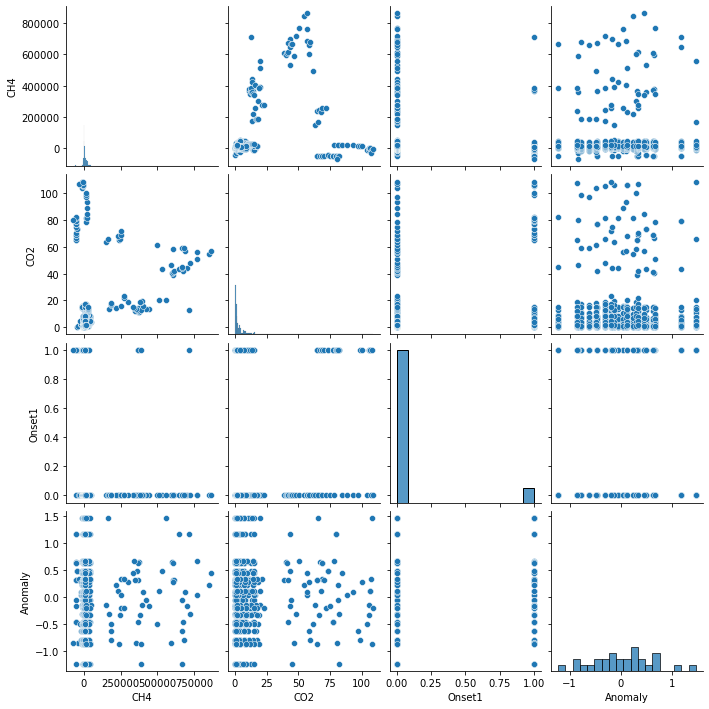

In [ ]:
# Taking a look at the distribution between variables in teleconnected countries
    # first visualizing the emissions variables vs Onset1 and Anomaly
    
sns.pairplot(df_final_teleconnected[['CH4','CO2','Onset1','Anomaly']])

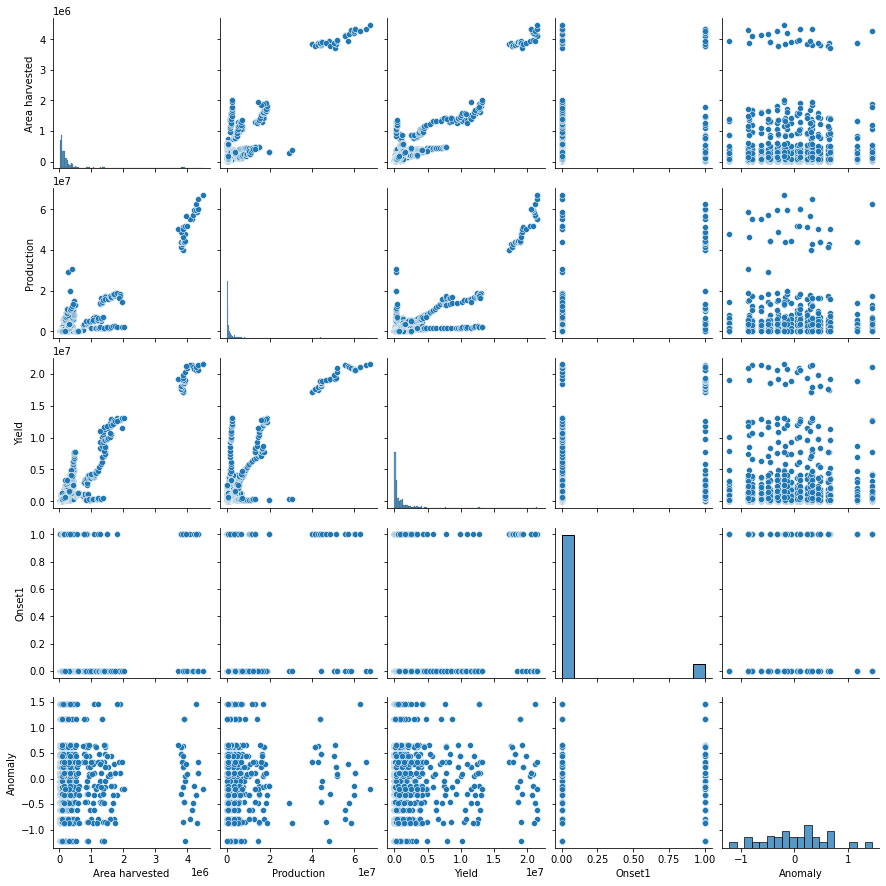

In [ ]:
# next the teleconnected group yield variables vs Onset1 and Anomaly

sns.pairplot(df_final_teleconnected[['Area harvested','Production','Yield','Onset1','Anomaly']])

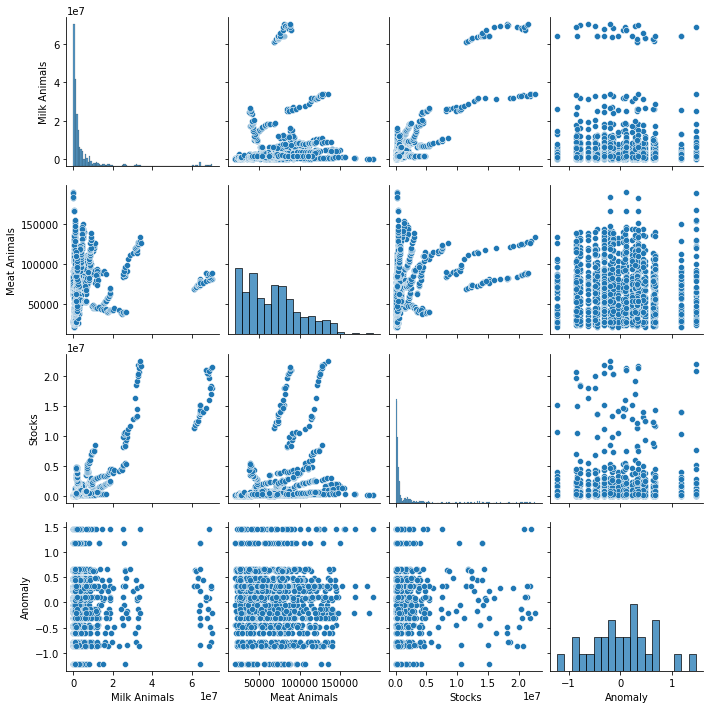

In [ ]:
# visualizing the teleconnected animal production variables vs onset and anomaly

sns.pairplot(df_final_teleconnected[['Milk Animals','Meat Animals','Stocks','Anomaly']])

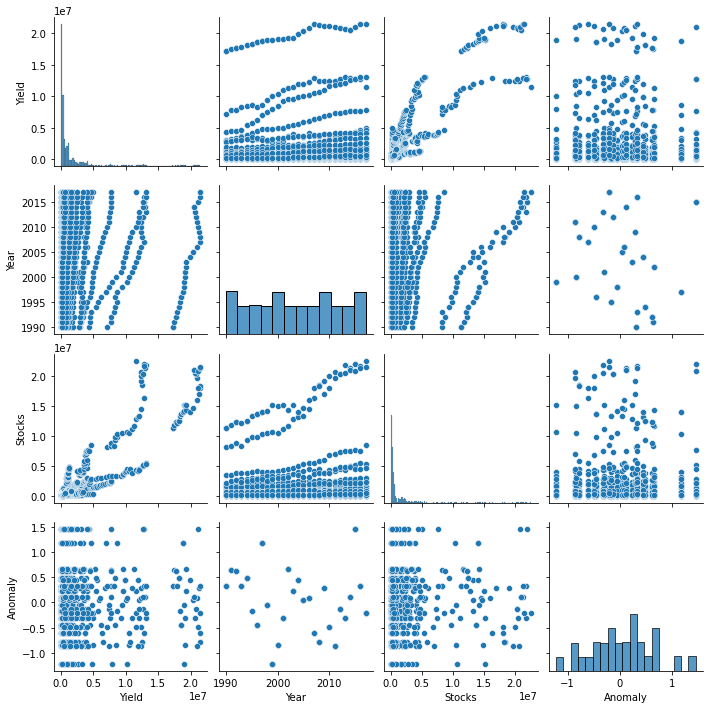

In [ ]:
# taking a look at trends over time

sns.pairplot(df_final_teleconnected[['Yield','Year','Stocks','Anomaly']])

For the above three sets of pair plots, there are clear sub-groups within all six of the input variables. These are likely from different sources of agriculture or emissions. For example, some outlier groups in the 'Production' vs 'Yield' charts are clearly more efficient than the bulk of the data.

Within the anomaly group, there appears to be some bunching of data points around the middle values, which we would expect if we assume that agriculture and human productivity (which emissions is a current proxy variable for) are highest under normal weather conditions. Climate shocks are present in teleconnected areas when 'Anomaly' is equal to or greater than 0.5 and when it's equal to or less than -0.5. We can see clearer bunching between Anomaly values of  -0.5 to 0.5 degrees C (indicating neutral climate conditions). 

In [ ]:
#### Splitting the data into two sets to run models with
    # one contains all countries the other just contains teleconnected countries
    # weakly affected countries will not be modeled on alone, since their sample size would be too small

In [ ]:
df_final.columns

Index(['Country', 'Year', 'Direct N2O', 'Indirect N2O', 'CH4', 'CO2eq & AR5',
       'CO2', 'Area harvested', 'Production', 'Yield', 'Stocks',
       'Milk Animals', 'Meat Animals', 'Onset1', 'Anomaly',
       'teleconnected_dummy'],
      dtype='object')

In [ ]:
# Creating the model variables including all countries

X = df_final.drop(['Country','Year','Onset1','teleconnected_dummy'],axis=1)
y = df_final['Onset1']
names = df_final['Country']

In [ ]:
# Split the train_test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state= 5)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((967, 12), (415, 12), (967,), (415,))

In [ ]:
# Creating the model variables for just teleconnected countries

X_t= df_final_teleconnected.drop(['Country','Year','Onset1','teleconnected_dummy'],axis=1)
y_t = df_final_teleconnected['Onset1']

In [ ]:
# Split the teleconnected train_test data

X_train_t,X_test_t,y_train_t,y_test_t = train_test_split(X_t ,y_t ,test_size=0.3,random_state= 5)

In [ ]:
X_train_t.shape,X_test_t.shape,y_train_t.shape,y_test_t.shape

((830, 12), (356, 12), (830,), (356,))

## How many ENSO years are present within the data?

In [ ]:
# Our df contains 73 years of ENSO data

len(nino_year['Year'])

73

In [ ]:
# Calculating the number of ENSO years present in the df

ENSO = nino_year['Anomaly']

Nina = -0.49
Nino = 0.49

nina_count = len([i for i in ENSO if i < Nina])
nino_count = len([i for i in ENSO if i > Nino])


enso_count = nino_count + nina_count 

    
print(enso_count, ' total ENSO years')
print (nina_count,' La Nina years','& ')
print(nino_count,' El Nino years')

33  total ENSO years
18  La Nina years & 
15  El Nino years


### There are 33 ENSO years out of 73 total years in our data 

Almost half of the dataset: 45.2% of years are ENSO years. This is a good balance.




## Random Forest Classifier

Random Forest Classifier on full data set - all countries included. n = 49

In [ ]:
num_trees = np.linspace(50,500,10)
num_trees

array([ 50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])

In [ ]:
oob_res=[]
for trs in num_trees:
    clf = RandomForestClassifier(n_estimators=int(trs),oob_score=True,random_state= 5).fit(X_train, y_train)
    oob_res.append(clf.oob_score_)

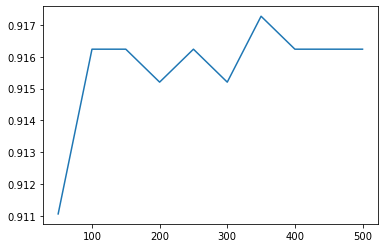

In [ ]:
plt.plot(num_trees,oob_res)

In [ ]:
np.argmax(oob_res)

6

In [ ]:
num_trees[6]

350.0

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=350,random_state=5).fit(X_train, y_train)

In [ ]:
print(classification_report(y_test,rf_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       381
           1       0.60      0.35      0.44        34

    accuracy                           0.93       415
   macro avg       0.77      0.67      0.70       415
weighted avg       0.92      0.93      0.92       415



In [ ]:
pd.crosstab(y_test,rf_clf.predict(X_test),rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,373,8
1,22,12


###### f1-score is an average of precision and recall (heavily influenced by the smaller of the two). We hope f1-score higher. That represents the precision and recall are not so bad. 

###### Here we regard 1 as the positive class. f1-score in Random Forest Classifier is 0.44 and the Recall is just 0.35. The model isn't doing a good job.

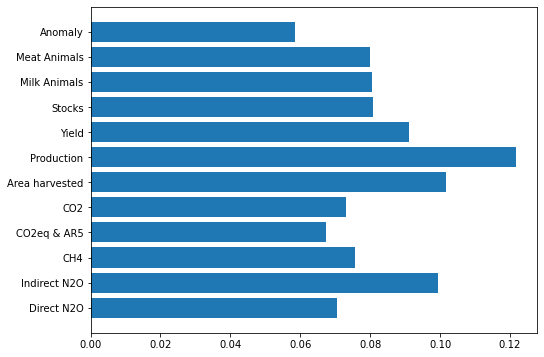

In [ ]:
# checking out Feature Importance of our x-variables

plt.figure(figsize=(8,6))
nfeat=X.shape[1]
plt.barh(np.arange(nfeat),rf_clf.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)
plt.show()

### Random Forest Classifier on teleconnected group
n = 42

In [ ]:
num_trees_t = np.linspace(50,500,10)
num_trees_t

array([ 50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])

In [ ]:
oob_res_t=[]
for trs_t in num_trees_t:
    clf_t = RandomForestClassifier(n_estimators=int(trs_t),oob_score=True,random_state= 5).fit(X_train_t, y_train_t)
    oob_res_t.append(clf_t.oob_score_)

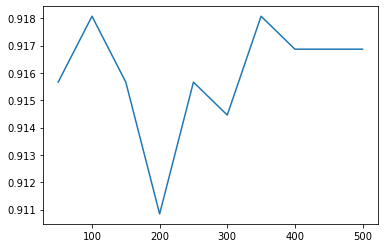

In [ ]:
plt.plot(num_trees_t,oob_res_t)

In [ ]:
np.argmax(oob_res_t)

1

In [ ]:
num_trees_t[1]

100.0

In [ ]:
rf_clf_t = RandomForestClassifier(n_estimators=100,random_state=5).fit(X_train_t, y_train_t)

In [ ]:
print(classification_report(y_test_t,rf_clf_t.predict(X_test_t)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       327
           1       0.53      0.28      0.36        29

    accuracy                           0.92       356
   macro avg       0.74      0.63      0.66       356
weighted avg       0.91      0.92      0.91       356



In [ ]:
pd.crosstab(y_test_t,rf_clf_t.predict(X_test_t),rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,320,7
1,21,8


######  Surprisingly, the teleconnected model performs slightly worse than the model on the full data set.

Taking a look at feature importance of the x-variables

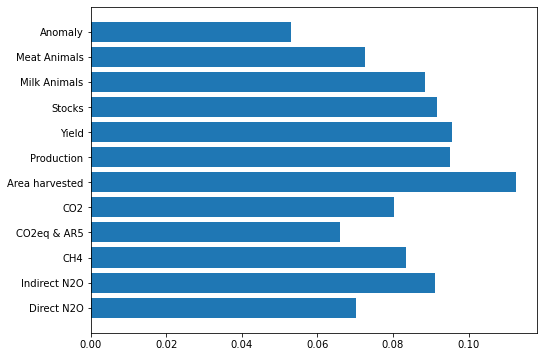

In [ ]:
# checking out Feature Importance of our x-variables

plt.figure(figsize=(8,6))
nfeat=X_t.shape[1]
plt.barh(np.arange(nfeat),rf_clf_t.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)
plt.show()

It's hard to say how much import the differences in each feature's representation has, since the differences between them are so small. It is remarkable that the Anomaly data is the least representative out of the group, since the literature would suggest the opposite.

## Gradient Boosting Classifier

Starting with the set of all countries: n = 49

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=5).fit(X_train,y_train)

In [ ]:
accuracy_score(gb_clf.predict(X_test),y_test)

0.9228915662650602

In [ ]:
print(classification_report(y_test,gb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       381
           1       0.55      0.35      0.43        34

    accuracy                           0.92       415
   macro avg       0.74      0.66      0.69       415
weighted avg       0.91      0.92      0.92       415



###### Fit on the full data set, the Gradient Boosting Classifier does slightly worse than the Random Forest Classifier (RFC). Recall here is equal to the RFC, but the f1 score is 0.02 points less.

### Gradient Boosting Classifier on teleconnected group
n = 43

In [ ]:
gb_clf_t = GradientBoostingClassifier(random_state=5).fit(X_train_t,y_train_t)

In [ ]:
accuracy_score(gb_clf_t.predict(X_test_t),y_test_t)

0.9185393258426966

In [ ]:
print(classification_report(y_test_t,gb_clf_t.predict(X_test_t)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       327
           1       0.50      0.31      0.38        29

    accuracy                           0.92       356
   macro avg       0.72      0.64      0.67       356
weighted avg       0.90      0.92      0.91       356



###### We still do not have a great model. The Gradient Boosting Classifier is still under performing the RFC.

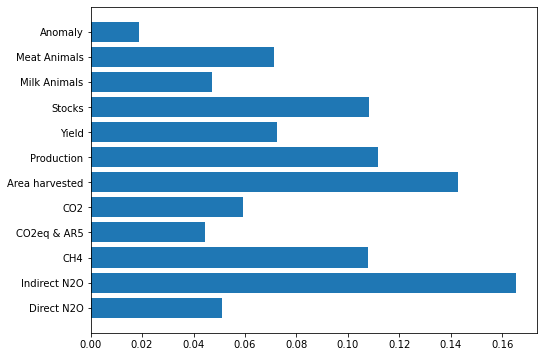

In [ ]:
# checking out Feature Importance of our x-variables

plt.figure(figsize=(8,6))
nfeat=X_t.shape[1]
plt.barh(np.arange(nfeat),gb_clf_t.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X_t.columns))
plt.ylim(-1,nfeat)
plt.show()

In an interesting development, the N2O levels appear to be responsible for most of the varaition captured by the Gradient Boosting model. However, the model is still not doing better than the random forest or how random chance would do in predicting conflict onset.

## Scaling the data

Starting with the set of all countries: n = 49

In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [ ]:
X_train_scaled.shape

(967, 12)

In [ ]:
X_train_scaled[0]

array([-0.39559653, -0.40523095, -0.25759784, -0.37662487, -0.39460177,
       -0.47442332, -0.37013804, -0.51077472, -0.42237477, -0.43472759,
       -0.93151389,  0.13911677])

In [ ]:
X.columns

Index(['Direct N2O', 'Indirect N2O', 'CH4', 'CO2eq & AR5', 'CO2',
       'Area harvested', 'Production', 'Yield', 'Stocks', 'Milk Animals',
       'Meat Animals', 'Anomaly'],
      dtype='object')

## Logistic Regression Classifier on scaled data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

##### Starting with the full data set: n = 49

In [ ]:
logreg_better=LogisticRegression(random_state=5).fit(X_train_scaled,y_train)

In [ ]:
print(classification_report(y_test,logreg_better.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       381
           1       0.75      0.26      0.39        34

    accuracy                           0.93       415
   macro avg       0.84      0.63      0.68       415
weighted avg       0.92      0.93      0.92       415



Still not getting gains in performance.

### Logistic Regression Classifier on scaled data, teleconnected set

n = 43

In [ ]:
# Scaling the teleconnected set

scaler=StandardScaler()
X_train_scaled_t=scaler.fit_transform(X_train_t)
X_test_scaled_t=scaler.fit_transform(X_test_t)

In [ ]:
logreg_better_t=LogisticRegression(random_state=5).fit(X_train_scaled_t,y_train_t)

In [ ]:
print(classification_report(y_test_t,logreg_better_t.predict(X_test_scaled_t)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       327
           1       0.78      0.24      0.37        29

    accuracy                           0.93       356
   macro avg       0.86      0.62      0.67       356
weighted avg       0.92      0.93      0.92       356



## Balancing out the target varaible using SMOTE

Using both the full sample and the teleconnected group to compare results.

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
# Full sample - rebalanced

# up-sampling: inject fake positives into the sample data by using KNN to create fake observations to balance out data
# takes 3 NN of a point, rand selects 1, puts new observation on a line between selected neighbor and new point
# it basically fills in the space between positives

oversample = SMOTE()
Xs, ys = oversample.fit_resample(X_train_scaled, y_train)

In [ ]:
np.sum(ys)/len(ys)

0.5

In [ ]:
# Teleconnected group - rebalanced

# up-sampling: inject fake positives into the sample data by using KNN to create fake observations to balance out data
# takes 3 NN of a point, rand selects 1, puts new observation on a line between selected neighbor and new point
# it basically fills in the space between positives

oversample = SMOTE()
Xst, yst = oversample.fit_resample(X_train_scaled_t, y_train_t)

In [ ]:
np.sum(yst)/len(yst)

0.5

The y-variables are now completely balanced! Let's see how the different classification models perform now.

### Random Forest Classifier - balanced y

####  Full sample
n = 49

In [ ]:
num_trees_s = np.linspace(50,500,10)
num_trees_s

array([ 50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])

In [ ]:
oob_res_s=[]
for trs in num_trees_s:
    clf_s = RandomForestClassifier(n_estimators=int(trs),oob_score=True,random_state= 5).fit(Xs, ys)
    oob_res_s.append(clf_s.oob_score_)

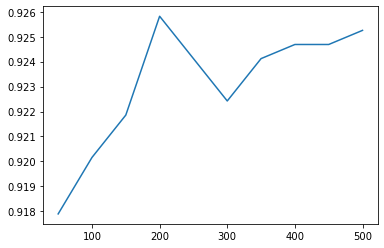

In [ ]:
plt.plot(num_trees_s,oob_res_s)

In [ ]:
np.argmax(oob_res_s)

3

In [ ]:
oob_res_s[6]

0.9241223103057757

In [ ]:
num_trees_s[6]

350.0

In [ ]:
rf_clf_s = RandomForestClassifier(n_estimators=350,random_state=5).fit(Xs, ys)

In [ ]:
print(classification_report(y_test,rf_clf_s.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       381
           1       0.26      0.59      0.36        34

    accuracy                           0.83       415
   macro avg       0.61      0.72      0.63       415
weighted avg       0.90      0.83      0.86       415



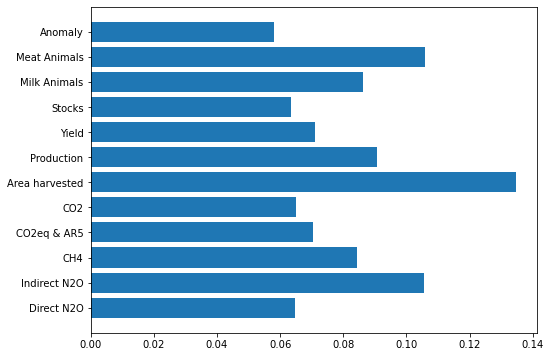

In [ ]:
# checking out Feature Importance of our x-variables

plt.figure(figsize=(8,6))
nfeat=X_t.shape[1]
plt.barh(np.arange(nfeat),rf_clf_s.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X_t.columns))
plt.ylim(-1,nfeat)
plt.show()

Area harvested and N2O continue to be the leading share of variation in the model, however it doesn't appear that balancing out the target varaible helped our model performance.

### Random Forest Classifier - balanced y
#### Teleconnected group 
n = 42

In [ ]:
num_trees_st = np.linspace(50,500,10)
num_trees_st

array([ 50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])

In [ ]:
oob_res_st=[]
for trs in num_trees_st:
    clf_st = RandomForestClassifier(n_estimators=int(trs),oob_score=True,random_state= 5).fit(Xst, yst)
    oob_res_st.append(clf_st.oob_score_)

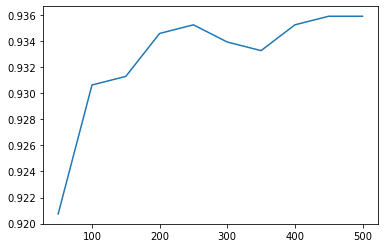

In [ ]:
plt.plot(num_trees_st,oob_res_st)

In [ ]:
np.argmax(oob_res_st)

8

In [ ]:
oob_res_st[9]

0.9359313077939234

In [ ]:
num_trees_st[9]

500.0

In [ ]:
rf_clf_st = RandomForestClassifier(n_estimators=500,random_state=5).fit(Xst, yst)

In [ ]:
print(classification_report(y_test_t,rf_clf_st.predict(X_test_scaled_t)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       327
           1       0.41      0.48      0.44        29

    accuracy                           0.90       356
   macro avg       0.68      0.71      0.70       356
weighted avg       0.91      0.90      0.91       356



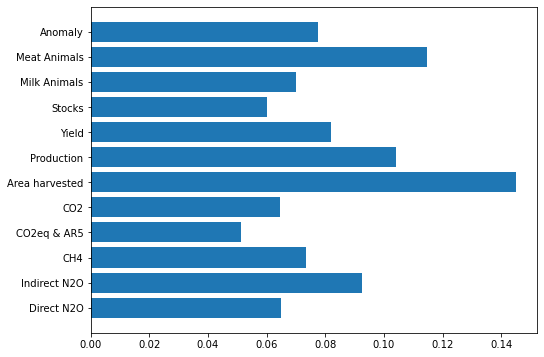

In [ ]:
# checking out Feature Importance of our x-variables

plt.figure(figsize=(8,6))
nfeat=X_t.shape[1]
plt.barh(np.arange(nfeat),rf_clf_st.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X_t.columns))
plt.ylim(-1,nfeat)
plt.show()

This model's f1 score is tied for first with our intial Regression Forest, but the recall score of 49% here is by far the best yet.

We are getting closer to at least being as good as random at predicting conflict incidence!

### Gradient Boosting Classifier - balanced y

#### Full sample

n = 49

In [ ]:
gb_clf_s = GradientBoostingClassifier(random_state=5).fit(Xs,ys)

In [ ]:
print(classification_report(y_test,gb_clf_s.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       381
           1       0.21      0.59      0.31        34

    accuracy                           0.78       415
   macro avg       0.58      0.69      0.59       415
weighted avg       0.89      0.78      0.83       415



While recall is getting impressively high here, the over-sampling seems to be true to its name, since all other scores are now falling.

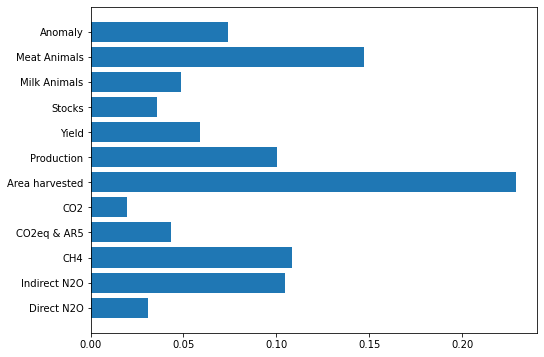

In [ ]:
# checking out Feature Importance of our x-variables

plt.figure(figsize=(8,6))
nfeat=X_t.shape[1]
plt.barh(np.arange(nfeat),gb_clf_s.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X_t.columns))
plt.ylim(-1,nfeat)
plt.show()


### Gradient Boosting Classifier - balanced y
#### Teleconnected group

n = 42

In [ ]:
gb_clf_st = GradientBoostingClassifier(random_state=5).fit(Xst,yst)

In [ ]:
print(classification_report(y_test_t,gb_clf_st.predict(X_test_scaled_t)))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       327
           1       0.23      0.59      0.33        29

    accuracy                           0.81       356
   macro avg       0.59      0.71      0.61       356
weighted avg       0.90      0.81      0.84       356



A higher recall, again, but significantly lower on all other performance measures.

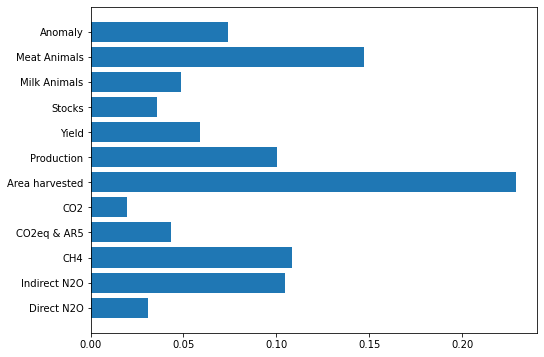

In [ ]:
# checking out Feature Importance of our x-variables

plt.figure(figsize=(8,6))
nfeat=X_t.shape[1]
plt.barh(np.arange(nfeat),gb_clf_s.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X_t.columns))
plt.ylim(-1,nfeat)
plt.show()

## Logistic Regression Classifier - balanced y

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_clf_Xs = LogisticRegression(random_state=5,penalty='none').fit(Xs, ys)

/Users/faelynn/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(lr_clf_Xs.coef_,lr_clf_Xs.intercept_)

[[-3.9499189  -1.58345936 -8.98328381 10.79437912  0.65455118  1.02013867
   0.27250989 -0.60593413 -1.40657024  1.46829529  0.1327437   0.19422441]] [-0.52047336]


In [ ]:
print(classification_report(y_test,lr_clf_Xs.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       381
           1       0.26      0.56      0.36        34

    accuracy                           0.84       415
   macro avg       0.61      0.71      0.63       415
weighted avg       0.90      0.84      0.86       415



# Our best model overall

### Random Forest Classifier - balanced y
 
##### Teleconnected group 
n = 42

In [ ]:
num_trees_st = np.linspace(50,500,10)
num_trees_st

array([ 50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])

In [ ]:
oob_res_st=[]
for trs in num_trees_st:
    clf_st = RandomForestClassifier(n_estimators=int(trs),oob_score=True,random_state= 5).fit(Xst, yst)
    oob_res_st.append(clf_st.oob_score_)

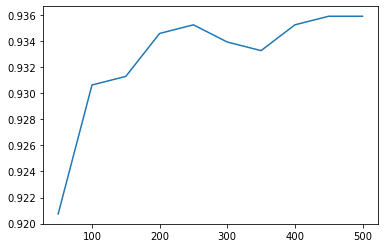

In [ ]:
plt.plot(num_trees_st,oob_res_st)

In [ ]:
np.argmax(oob_res_st)

8

In [ ]:
oob_res_st[9]

0.9359313077939234

In [ ]:
num_trees_st[9]

500.0

In [ ]:
rf_clf_st = RandomForestClassifier(n_estimators=500,random_state=5).fit(Xst, yst)

In [ ]:
print(classification_report(y_test_t,rf_clf_st.predict(X_test_scaled_t)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       327
           1       0.41      0.48      0.44        29

    accuracy                           0.90       356
   macro avg       0.68      0.71      0.70       356
weighted avg       0.91      0.90      0.91       356



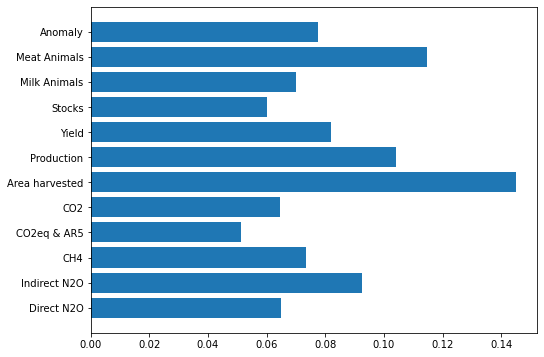

In [ ]:
# checking out Feature Importance of our x-variables

plt.figure(figsize=(8,6))
nfeat=X_t.shape[1]
plt.barh(np.arange(nfeat),rf_clf_st.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X_t.columns))
plt.ylim(-1,nfeat)
plt.show()

This model's f1 score is tied for first with our intial Regression Forest, but the recall score of 49% here is by far the best yet.

We are getting closer to at least being as good as random at predicting conflict incidence!

In short, conflict onset is notoriously difficult to predict. Our results confirm that teleconnected groups do see a slightly higher prediction power for conflict onset.

See full analysis and conclusion at the top of this file.

In [ ]:
df_final.to_csv('df_final_ml_fp.csv')